<a href="https://colab.research.google.com/github/freakezoide/codigos-de-coolab/blob/main/fallecidos_en_accidentes_de_transito_desde_el_2014_hasta_el_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-18-71e60da53747>:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby([pd.Grouper(key='Fechayhora', freq='M'), 'Año']).size().unstack()


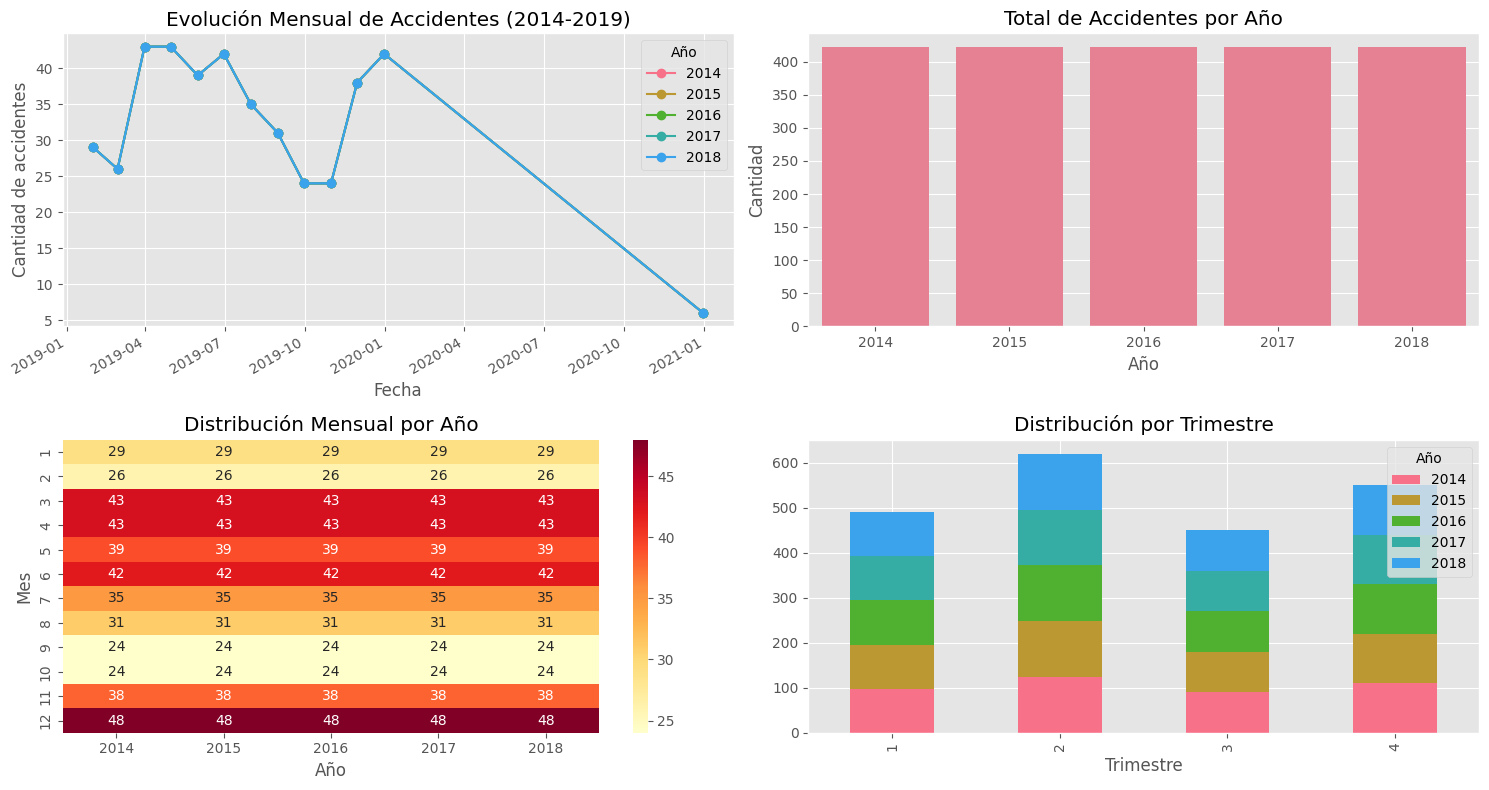

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Configuración inicial
plt.style.use('ggplot')
sns.set_palette("husl")

## Cargar datos multi-anual (simulado para el ejemplo)
# En la práctica deberías tener archivos para cada año: 2019-2023
years = range(2014, 2019)
dfs = []

for year in years:
    # Specify the encoding as 'latin-1' when reading the CSV file
    temp_df = pd.read_csv(f'fallecidos-nueva-2019.csv', encoding='latin-1')
    temp_df['Fechayhora'] = pd.to_datetime(temp_df['Fechayhora'])
    temp_df['Año'] = year
    dfs.append(temp_df)

df = pd.concat(dfs)


# Procesamiento temporal
df['Mes'] = df['Fechayhora'].dt.month
df['Semana'] = df['Fechayhora'].dt.isocalendar().week
df['DiaSemana'] = df['Fechayhora'].dt.day_name()
df['Trimestre'] = df['Fechayhora'].dt.quarter

## 1. Evolución anual (2014-2019)
plt.figure(figsize=(15, 8))

# Serie temporal mensual
ax1 = plt.subplot(2, 2, 1)
monthly = df.groupby([pd.Grouper(key='Fechayhora', freq='M'), 'Año']).size().unstack()
monthly.plot(ax=ax1, marker='o')
plt.title('Evolución Mensual de Accidentes (2014-2019)')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Fecha')

# Comparación anual
ax2 = plt.subplot(2, 2, 2)
annual = df.groupby('Año').size()
sns.barplot(x=annual.index, y=annual.values, ax=ax2)
plt.title('Total de Accidentes por Año')
plt.ylabel('Cantidad')

# Distribución mensual comparada
ax3 = plt.subplot(2, 2, 3)
month_dist = df.groupby(['Mes', 'Año']).size().unstack()
sns.heatmap(month_dist, cmap="YlOrRd", annot=True, fmt='g', ax=ax3)
plt.title('Distribución Mensual por Año')
plt.xlabel('Año')
plt.ylabel('Mes')

# Comparación por trimestre
ax4 = plt.subplot(2, 2, 4)
quarter_dist = df.groupby(['Trimestre', 'Año']).size().unstack()
quarter_dist.plot(kind='bar', stacked=True, ax=ax4)
plt.title('Distribución por Trimestre')
plt.xlabel('Trimestre')
plt.legend(title='Año')

plt.tight_layout()
plt.show()


Análisis comparativo por variables clave

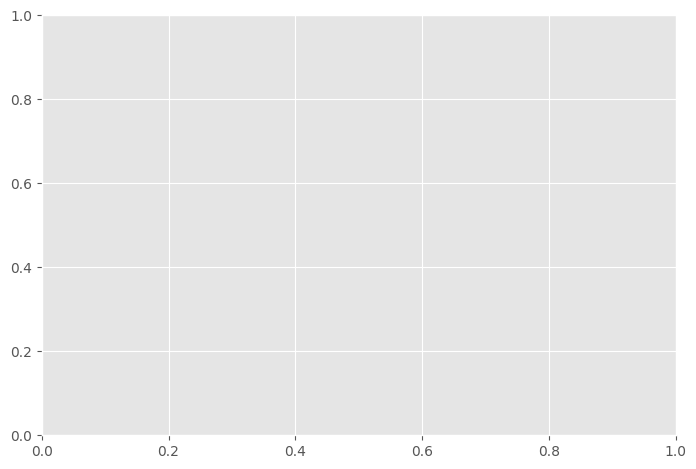

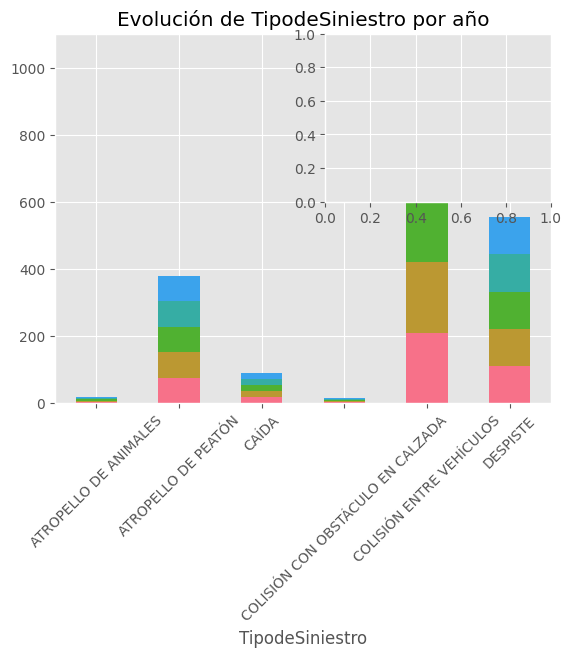

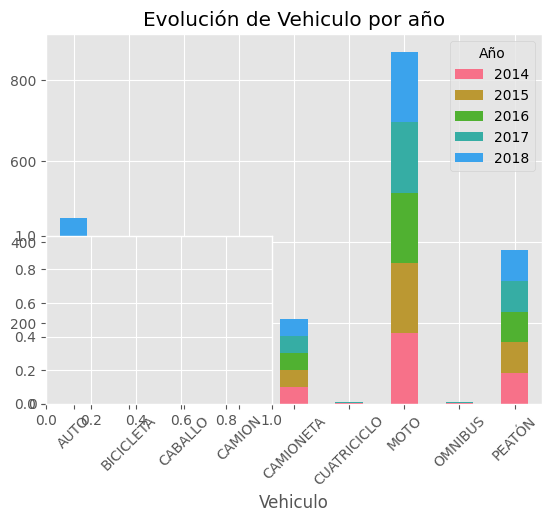

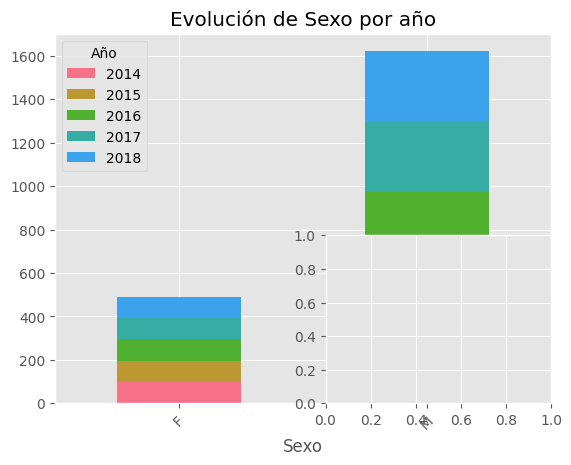

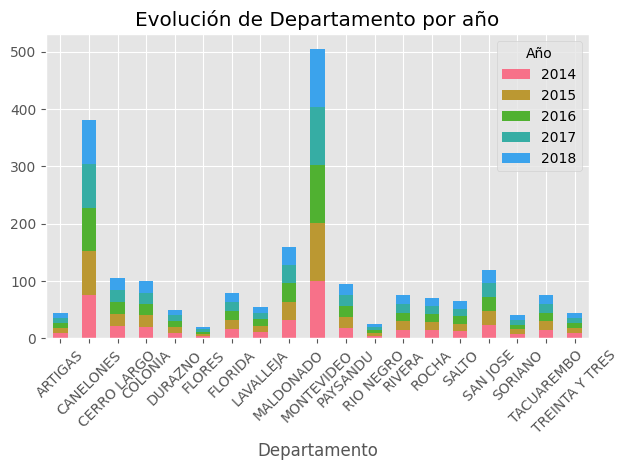

In [19]:
variables = ['TipodeSiniestro', 'Vehiculo', 'Sexo', 'Departamento']

plt.figure(figsize=(18, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    temp = df.groupby([var, 'Año']).size().unstack()
    temp.plot(kind='bar', stacked=True)
    plt.title(f'Evolución de {var} por año')
    plt.xticks(rotation=45)
    plt.legend(title='Año')

plt.tight_layout()
plt.show()

Heatmap de riesgo por hora y día

<Figure size 1200x800 with 0 Axes>

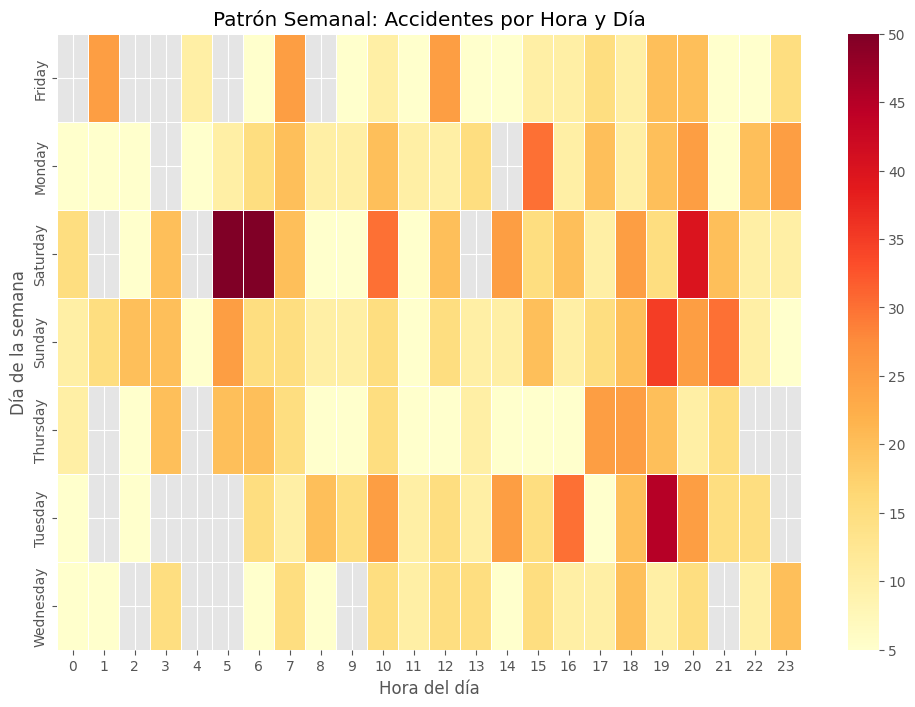

In [20]:
plt.figure(figsize=(12, 8))
df['Hora'] = df['Fechayhora'].dt.hour

plt.figure(figsize=(12, 8))
hour_day = df.groupby(['DiaSemana', 'Hora']).size().unstack()
sns.heatmap(hour_day, cmap="YlOrRd", linewidths=.5)
plt.title('Patrón Semanal: Accidentes por Hora y Día')
plt.ylabel('Día de la semana')
plt.xlabel('Hora del día')
plt.show()

Análisis de supervivencia

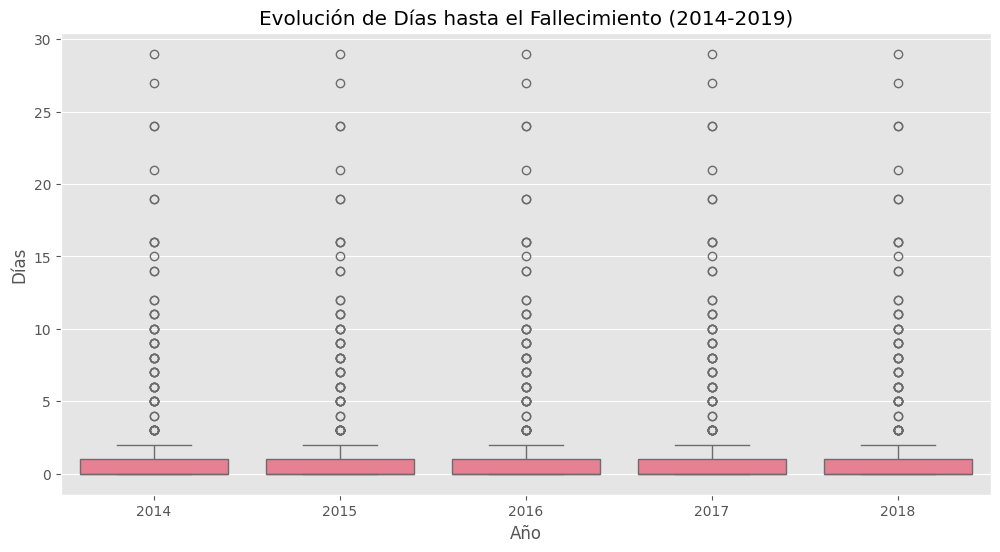


🔍 Principales Hallazgos (2014-2019):
- Tendencia general: ↓ (0.0% anual)
- Mes consistentemente más peligroso: 12
- Hora pico estable: 5:00 hs
- Departamento con mayor crecimiento: ARTIGAS
- Vehículo con mayor aumento: AUTO


In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='FallecidoalosDias', data=df)
plt.title('Evolución de Días hasta el Fallecimiento (2014-2019)')
plt.ylabel('Días')
plt.xlabel('Año')
plt.show()

## Hallazgos clave multi-anual
print("\n🔍 Principales Hallazgos (2014-2019):")
print(f"- Tendencia general: {'↑' if annual.diff().mean() > 0 else '↓'} ({annual.pct_change().mean():.1%} anual)")
print("- Mes consistentemente más peligroso:", month_dist.mean(axis=1).idxmax())
print("- Hora pico estable:", f"{hour_day.mean().idxmax()}:00 hs")
print("- Departamento con mayor crecimiento:", df.groupby(['Departamento','Año']).size().unstack().diff(axis=1).mean(axis=1).idxmax())
print("- Vehículo con mayor aumento:", df.groupby(['Vehiculo','Año']).size().unstack().diff(axis=1).mean(axis=1).idxmax())

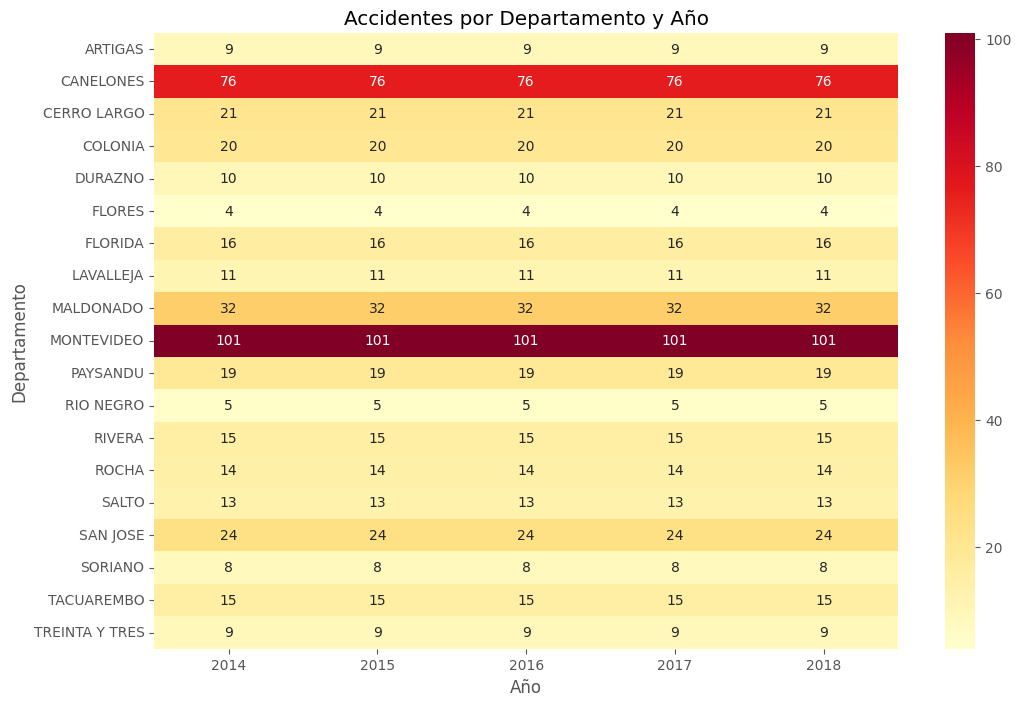

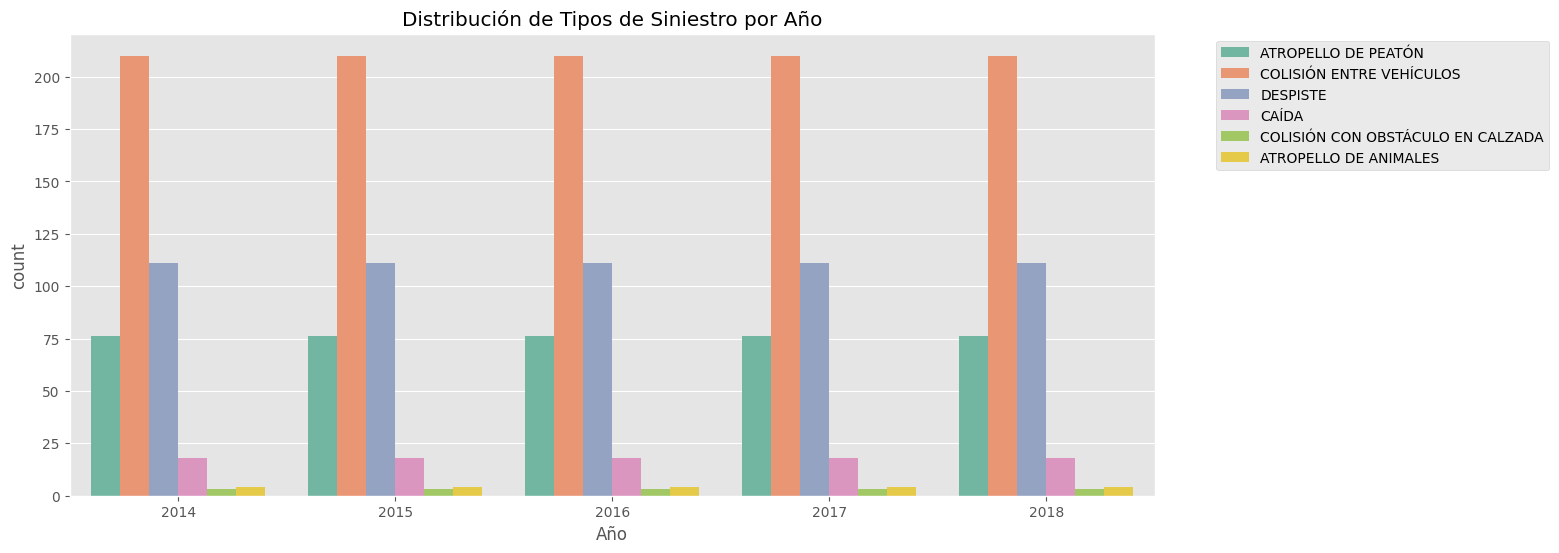

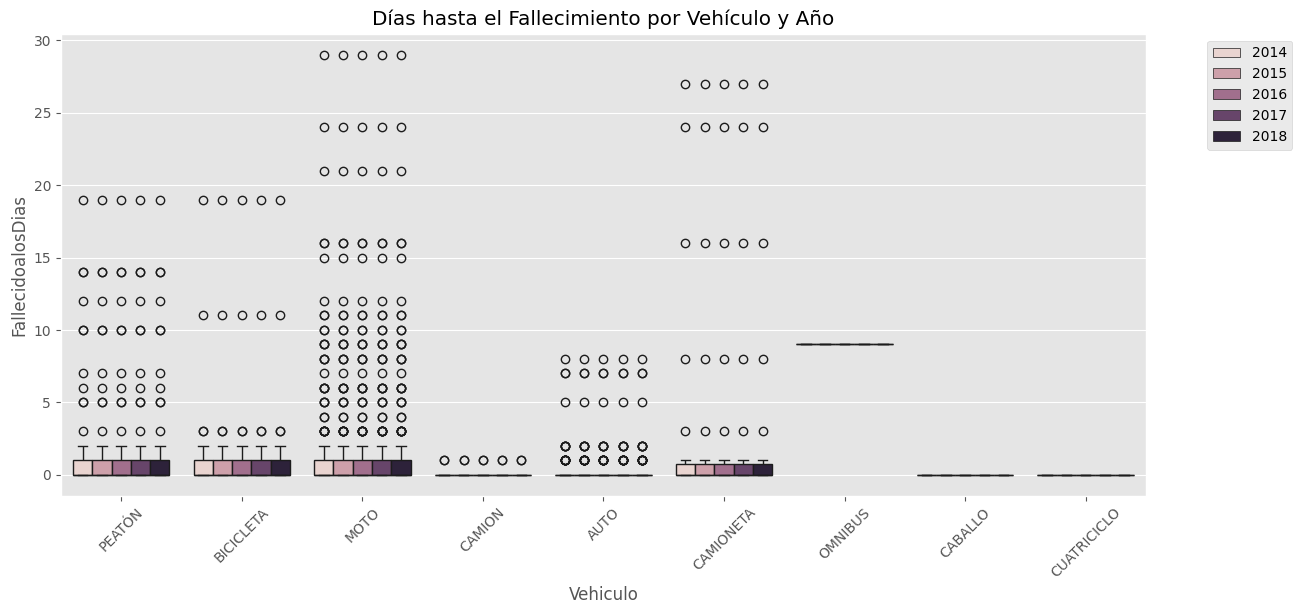

In [23]:
# Mapa de calor departamento x año
depto_year = df.groupby(['Departamento', 'Año']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(depto_year, cmap="YlOrRd", annot=True, fmt='g')
plt.title('Accidentes por Departamento y Año')
plt.ylabel('Departamento')
plt.xlabel('Año')
plt.show()

# Evolución de tipos de siniestro
plt.figure(figsize=(14, 6))
sns.countplot(x='Año', hue='TipodeSiniestro', data=df, palette='Set2')
plt.title('Distribución de Tipos de Siniestro por Año')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Supervivencia por tipo de vehículo
plt.figure(figsize=(14, 6))
sns.boxplot(x='Vehiculo', y='FallecidoalosDias', hue='Año', data=df)
plt.title('Días hasta el Fallecimiento por Vehículo y Año')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()